## Facebook Ad Campaigns:
1. Create two charts using rolling() method to display the moving average of:
    - Daily advertising spend in 2021;
    - Daily ROMI in 2021.
2.  Create two charts:
    - The total advertising spend in each campaign;
    - Overall ROMI in each campaign.
3. Determine the spread of daily ROMI in each campaign (by campaign name)
4. Create a chart with the distribution of ROMI values in the facebook_ads_data.csv table.
5. Build a heatmap of the correlation between all numerical indicators in the facebook_ads_data.csv table. Identify which indicators have the highest and lowest correlation. What does "total_value" correlate with?
6. Create a scatter plot with linear regression using the lmplot() function to visualize the relationship between "total_spend" and "total_value."

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

plt.rcParams['figure.figsize'] = [28, 10] # setting standard plot size for all notebook page
sns.set(style = "whitegrid") # general style of the plots

In [2]:
campaigns = pd.read_csv('C:/Users/plish/Desktop/Python_HW/Facebook Ad campaigns Analysis and Viz/facebook_ads_data.csv')

In [3]:
campaigns.dropna(subset = ['cpc', 'ctr', 'romi'], inplace=True) # cleaning data from Nan values (strings)

In [4]:
campaigns.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1443 entries, 2 to 1493
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ad_date            1443 non-null   object 
 1   campaign_name      1443 non-null   object 
 2   total_spend        1443 non-null   float64
 3   total_impressions  1443 non-null   int64  
 4   total_clicks       1443 non-null   int64  
 5   total_value        1443 non-null   float64
 6   cpc                1443 non-null   float64
 7   cpm                1443 non-null   float64
 8   ctr                1443 non-null   float64
 9   romi               1443 non-null   float64
dtypes: float64(6), int64(2), object(2)
memory usage: 124.0+ KB


## 1. Create two charts using rolling() method to display the moving average of:
    - Daily advertising spend in 2021;
    - Daily ROMI in 2021.

In [5]:
data_2021 = campaigns.loc[campaigns['ad_date'].between('2021-01-01', '2021-12-31')] # getting only 2021 year data  
data_set = data_2021.groupby('ad_date').agg({'total_spend' : 'sum', 'romi' : 'mean'})
data_set

,total_spend,romi
ad_date,,
2021-01-02,7.74,0.891473
2021-01-04,70.06,0.977305
2021-01-05,81.15,0.760074
2021-01-06,142.70,1.022425
2021-01-07,116.37,1.531323
...,...,...
2021-12-27,478.31,1.412261
2021-12-28,359.83,1.392740
2021-12-29,163.25,1.263469


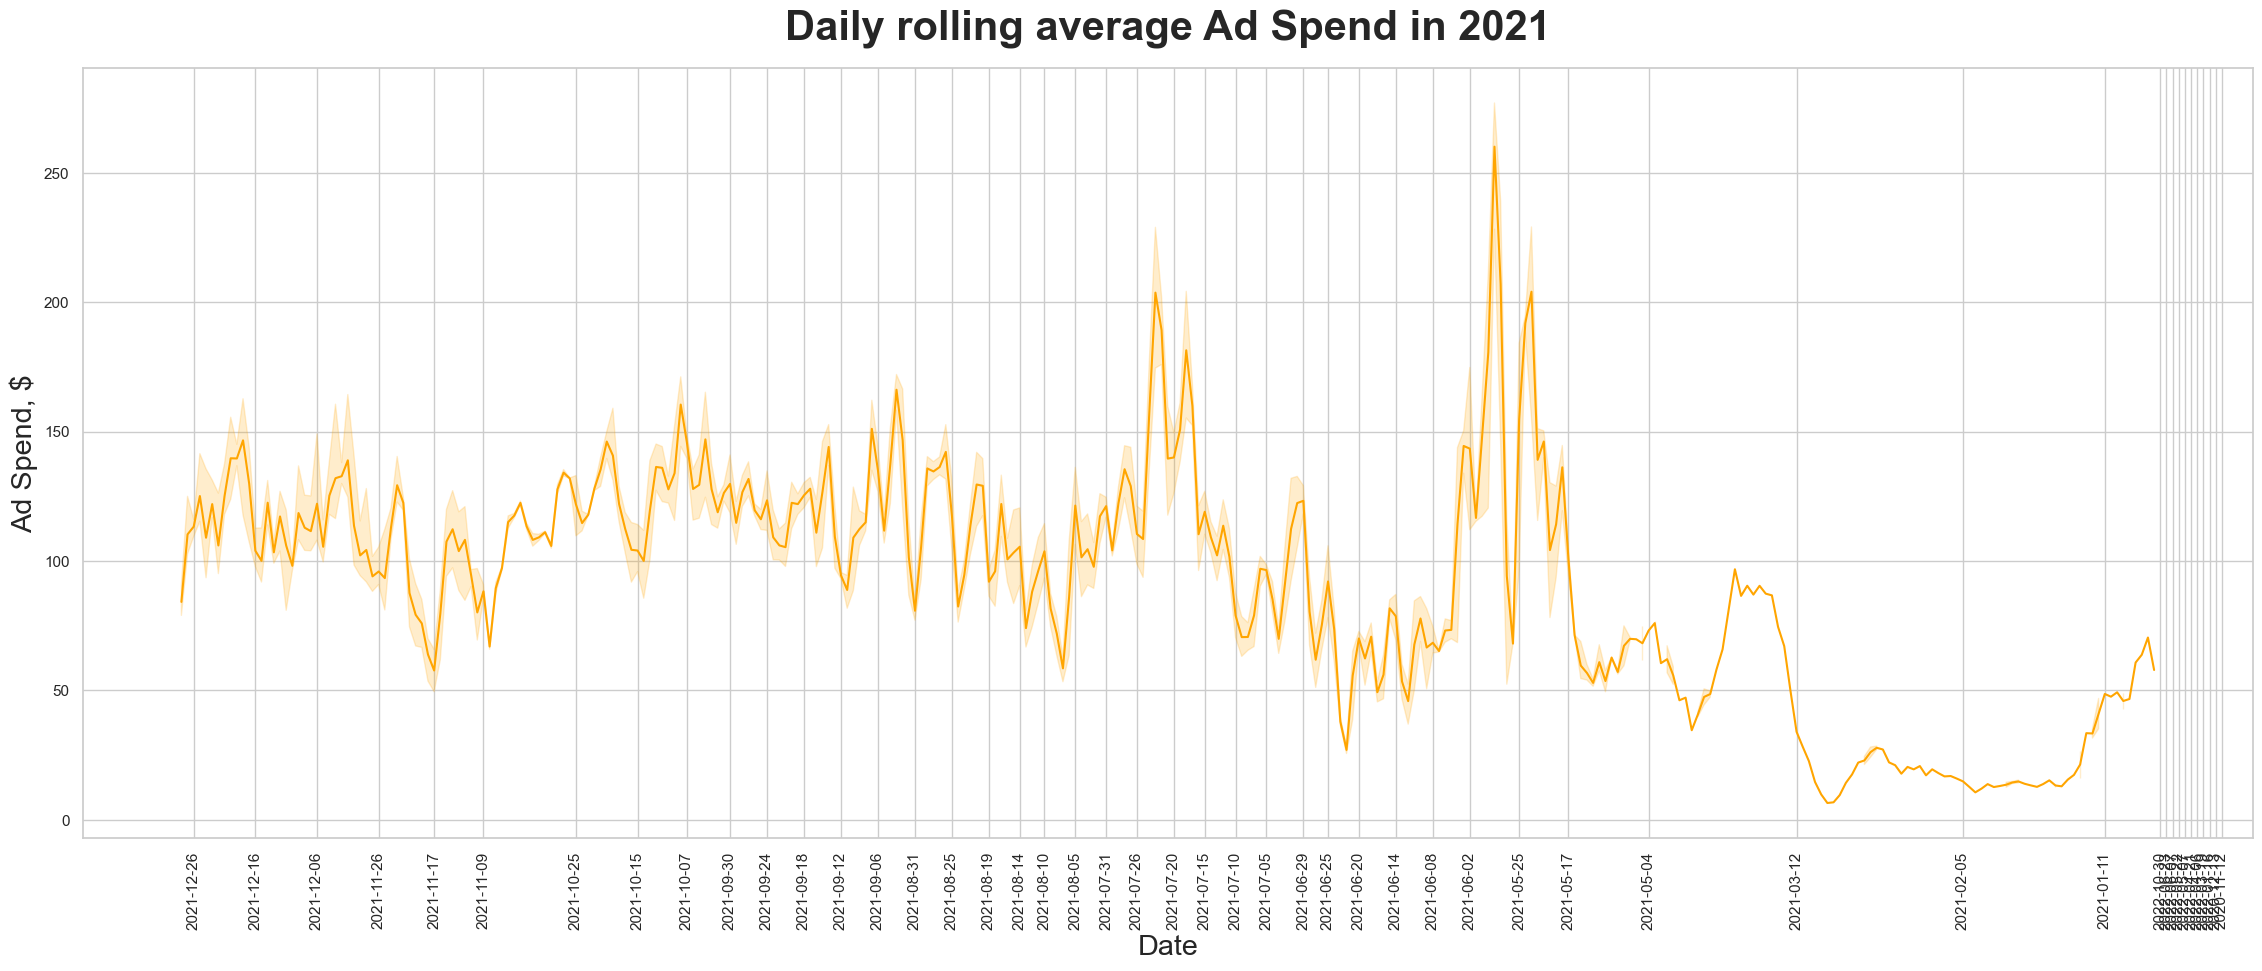

In [6]:
# Daily rolling average Ad Spend in 2021 Chart
sns.lineplot(x = 'ad_date', y = data_2021['total_spend'].rolling(10).mean(), data = data_2021, color= 'orange') 
plt.title('Daily rolling average Ad Spend in 2021', fontdict={'fontsize': 30, 'fontweight': 'bold'}, pad = 20)
plt.xlabel('Date', fontsize= 'xx-large')
plt.ylabel('Ad Spend, $', fontsize='xx-large')
plt.xticks(rotation=90)
plt.xticks(list(campaigns['ad_date'])[1::30])

plt.show()

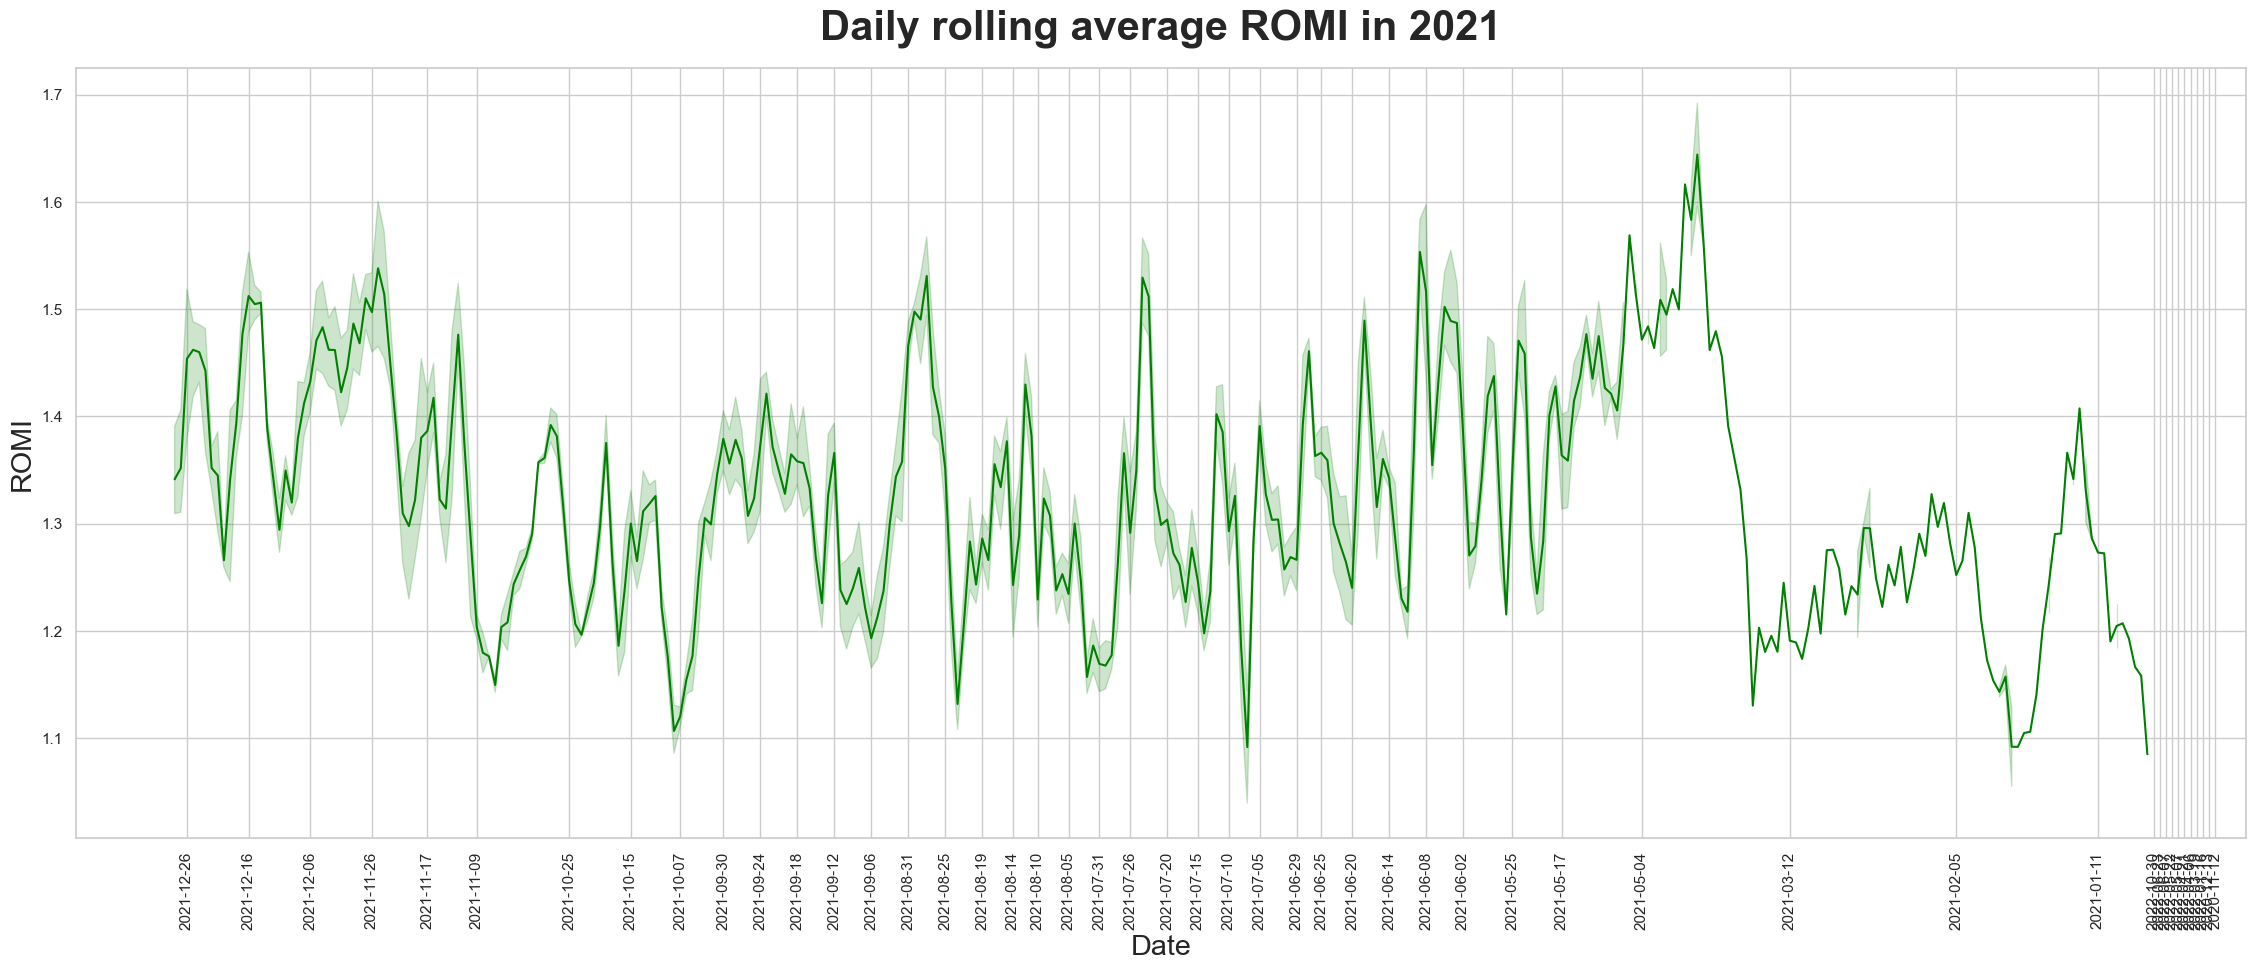

In [7]:
# Daily ROMI in 2021 Chart
sns.lineplot(x = 'ad_date', y = data_2021['romi'].rolling(10).mean(), data = data_2021, color= 'green')
plt.title('Daily rolling average ROMI in 2021', fontdict={'fontsize': 30, 'fontweight': 'bold'}, pad = 20)
plt.xlabel('Date', fontsize= 'xx-large')
plt.ylabel('ROMI', fontsize='xx-large')
plt.xticks(rotation=90)
plt.xticks(list(campaigns['ad_date'])[1::30])

plt.show()

## 2. Create two charts:
    - The total advertising spend in each campaign;
    - Overall ROMI in each campaign.

In [8]:
# creating data frame aggegated by ad campaign
campaign_data = campaigns.groupby('campaign_name').agg({'total_spend' : 'sum', 'romi' : 'mean'}).reset_index()

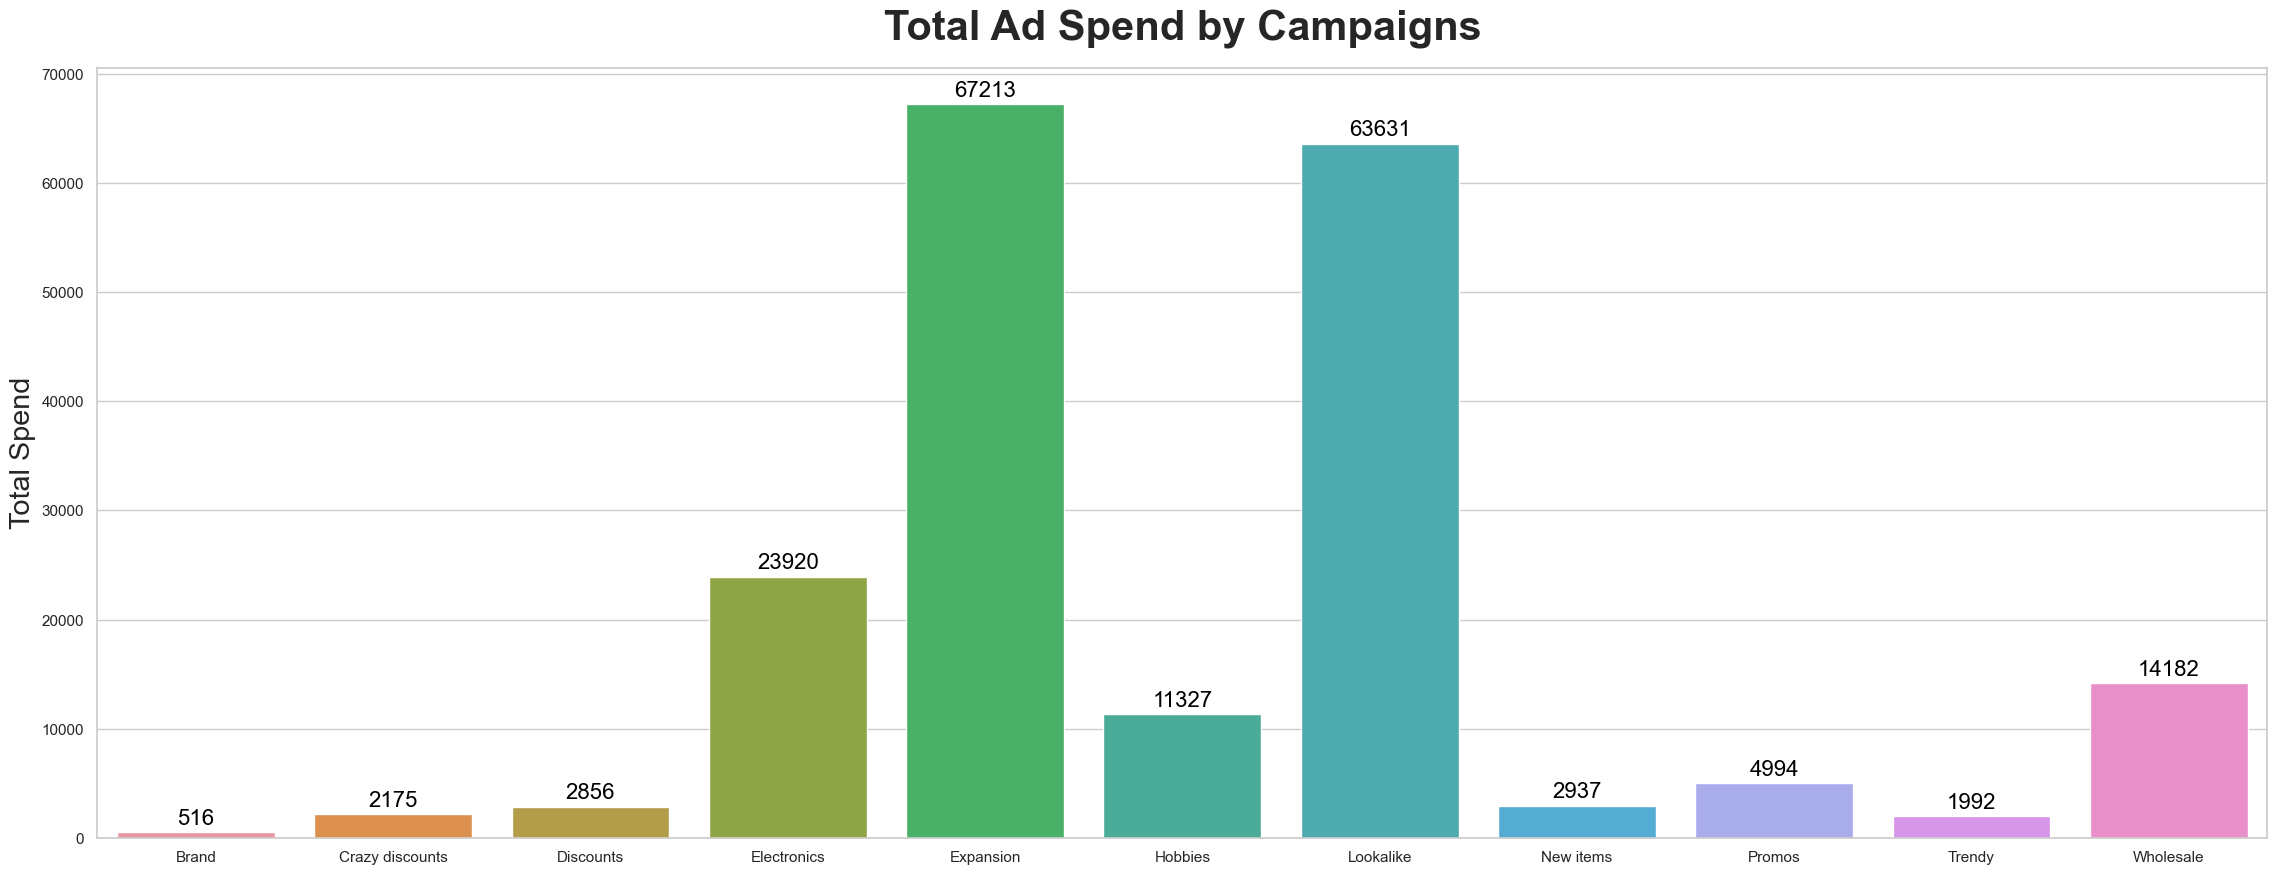

In [9]:
# Total Spend on Ad Campaign
ax = sns.barplot(x = 'campaign_name', y = 'total_spend', data = campaign_data)
plt.title('Total Ad Spend by Campaigns', fontdict={'fontsize': 30, 'fontweight': 'bold'}, pad = 20)
plt.xlabel(None, fontsize= 'xx-large')
plt.ylabel('Total Spend', fontsize='xx-large')
# Display values on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=16, color='black', xytext=(0, 10),
                textcoords='offset points')
plt.show()

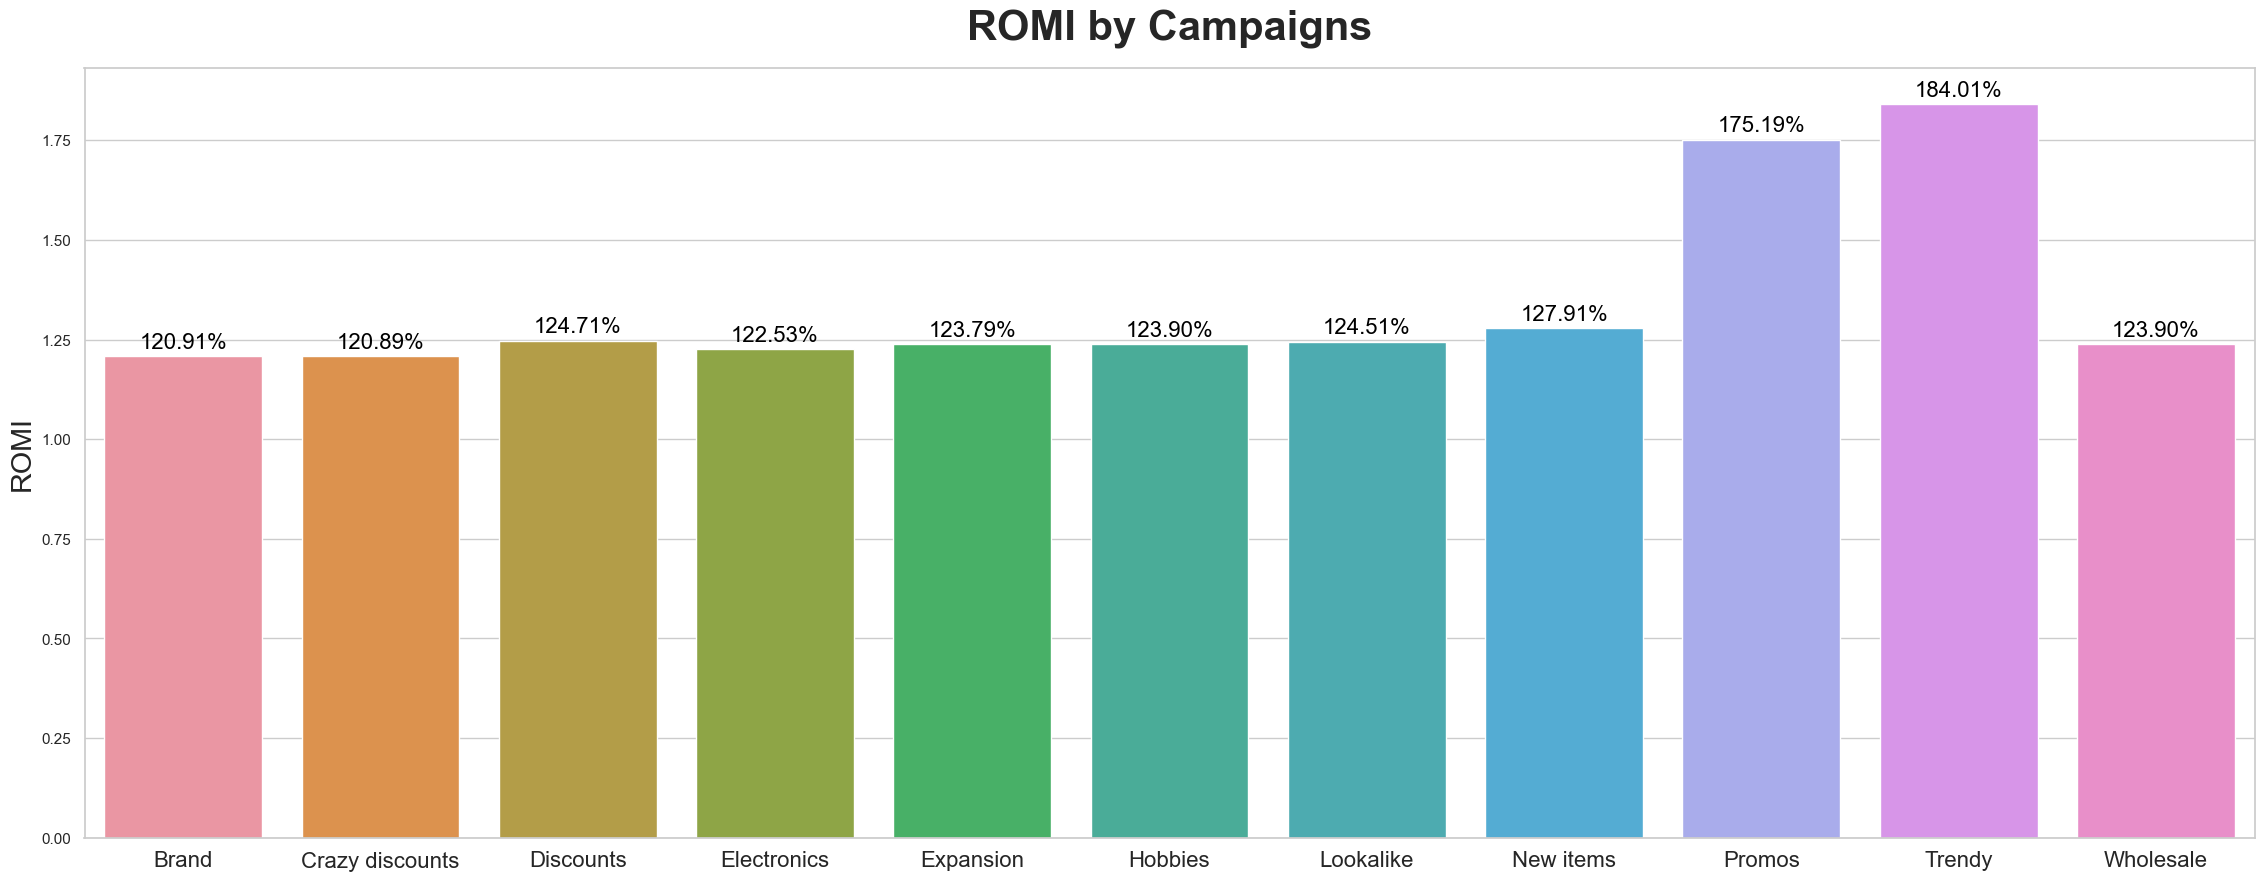

In [10]:
# Total ROMI on each Campaign
ax = sns.barplot(x = 'campaign_name', y = 'romi', data = campaign_data)
plt.title('ROMI by Campaigns', fontdict={'fontsize': 30, 'fontweight': 'bold'}, pad = 20)
plt.xlabel(None, fontsize= 'xx-large')
plt.ylabel('ROMI', fontsize='xx-large')
# Display values on each bar
for p in ax.patches:
    ax.annotate(f'{(p.get_height())*100:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=16, color='black', xytext=(0, 10),
                textcoords='offset points')
ax.tick_params(axis= 'x', which='major', labelsize=16)
plt.show()

## 3. Determine the spread of daily ROMI in each campaign (by campaign name)

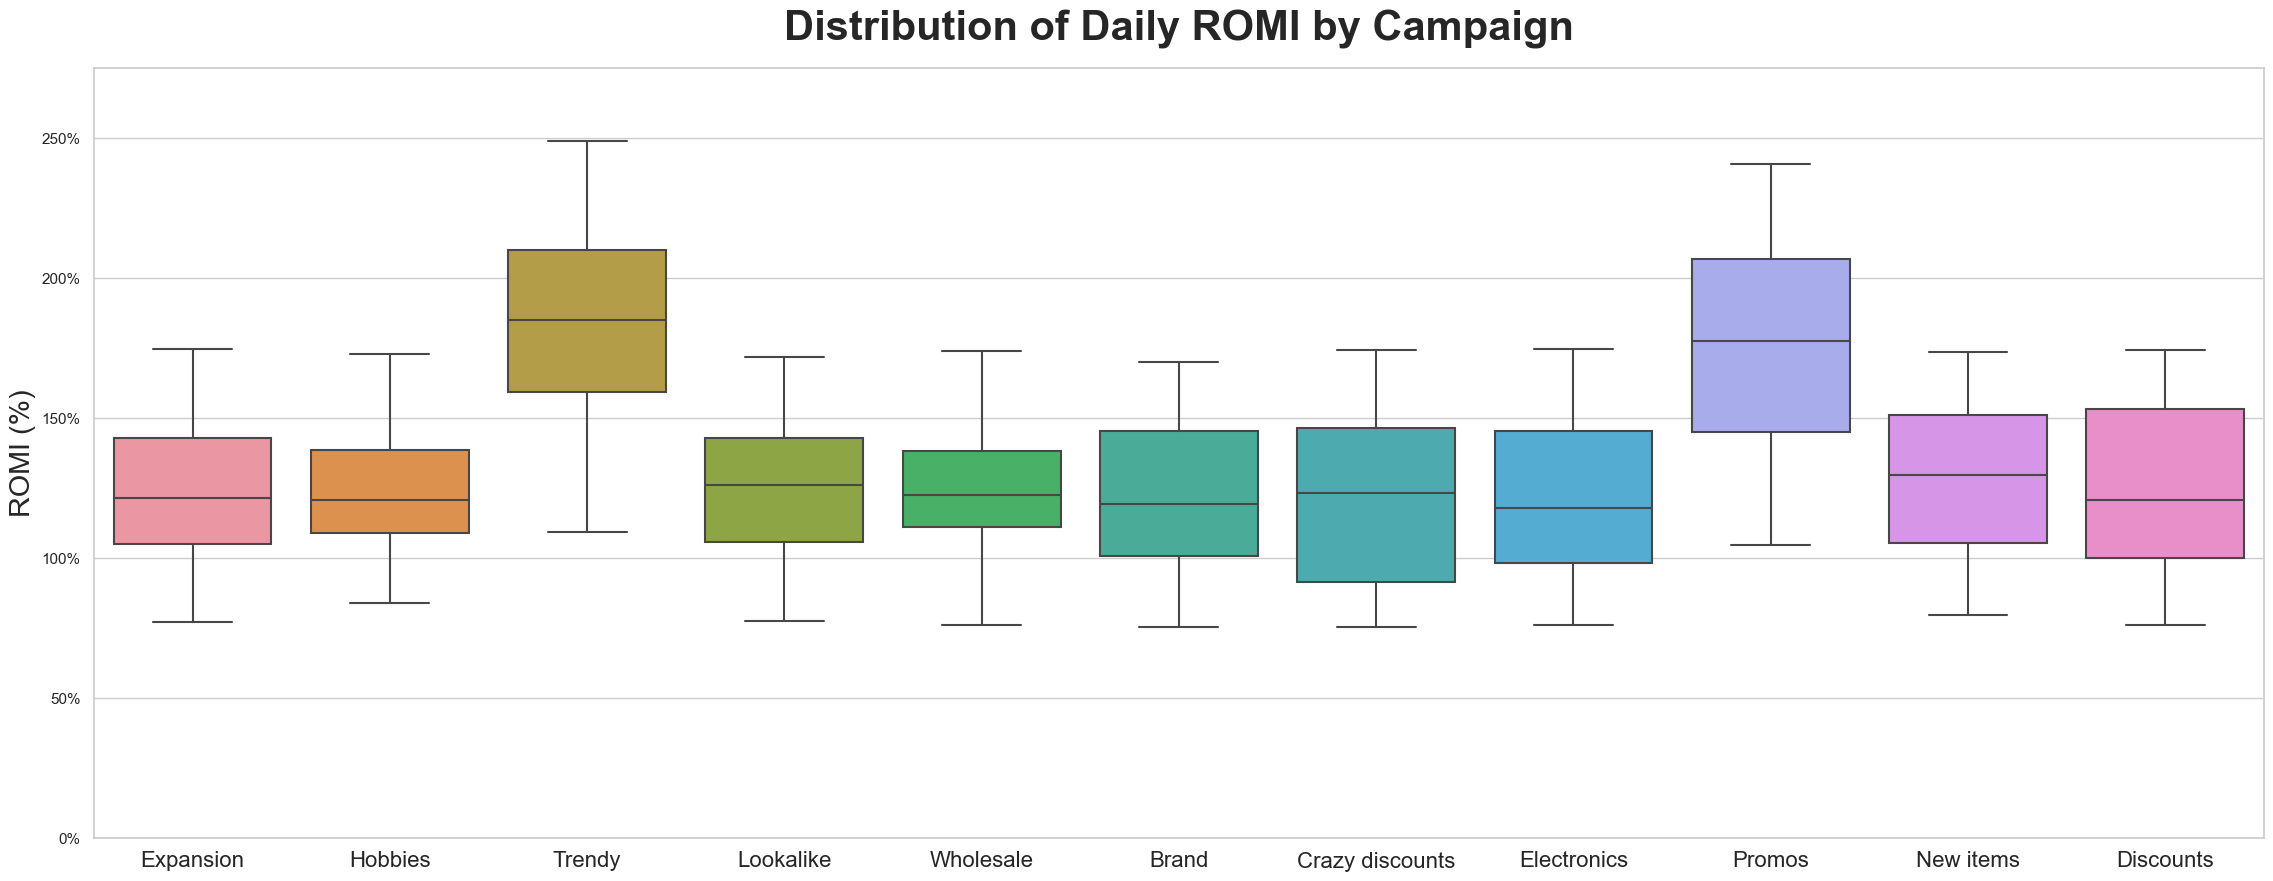

In [11]:
# Determine the spread of daily ROMI in each campaign (by campaign name) using a box plot
from matplotlib.ticker import PercentFormatter # import to be able to format Y-axis to %

campaigns['romi_perc'] = campaigns['romi'] * 100 # create new column to convert ROMI into %

daily_romi = sns.boxplot(x = 'campaign_name', y = 'romi_perc', data = campaigns)
plt.title('Distribution of Daily ROMI by Campaign', fontdict={'fontsize': 30, 'fontweight': 'bold'}, pad = 20)
plt.xlabel(None, fontsize= 'xx-large')
plt.ylabel('ROMI (%)', fontsize='xx-large')
daily_romi.set_ylim(0, 275) # set y-axis limits
daily_romi.yaxis.set_major_formatter(PercentFormatter(decimals=0))

daily_romi.tick_params(axis= 'x', which='major', labelsize=16)

plt.show()

## 4. Create a chart with the distribution of ROMI values in the facebook_ads_data.csv table.

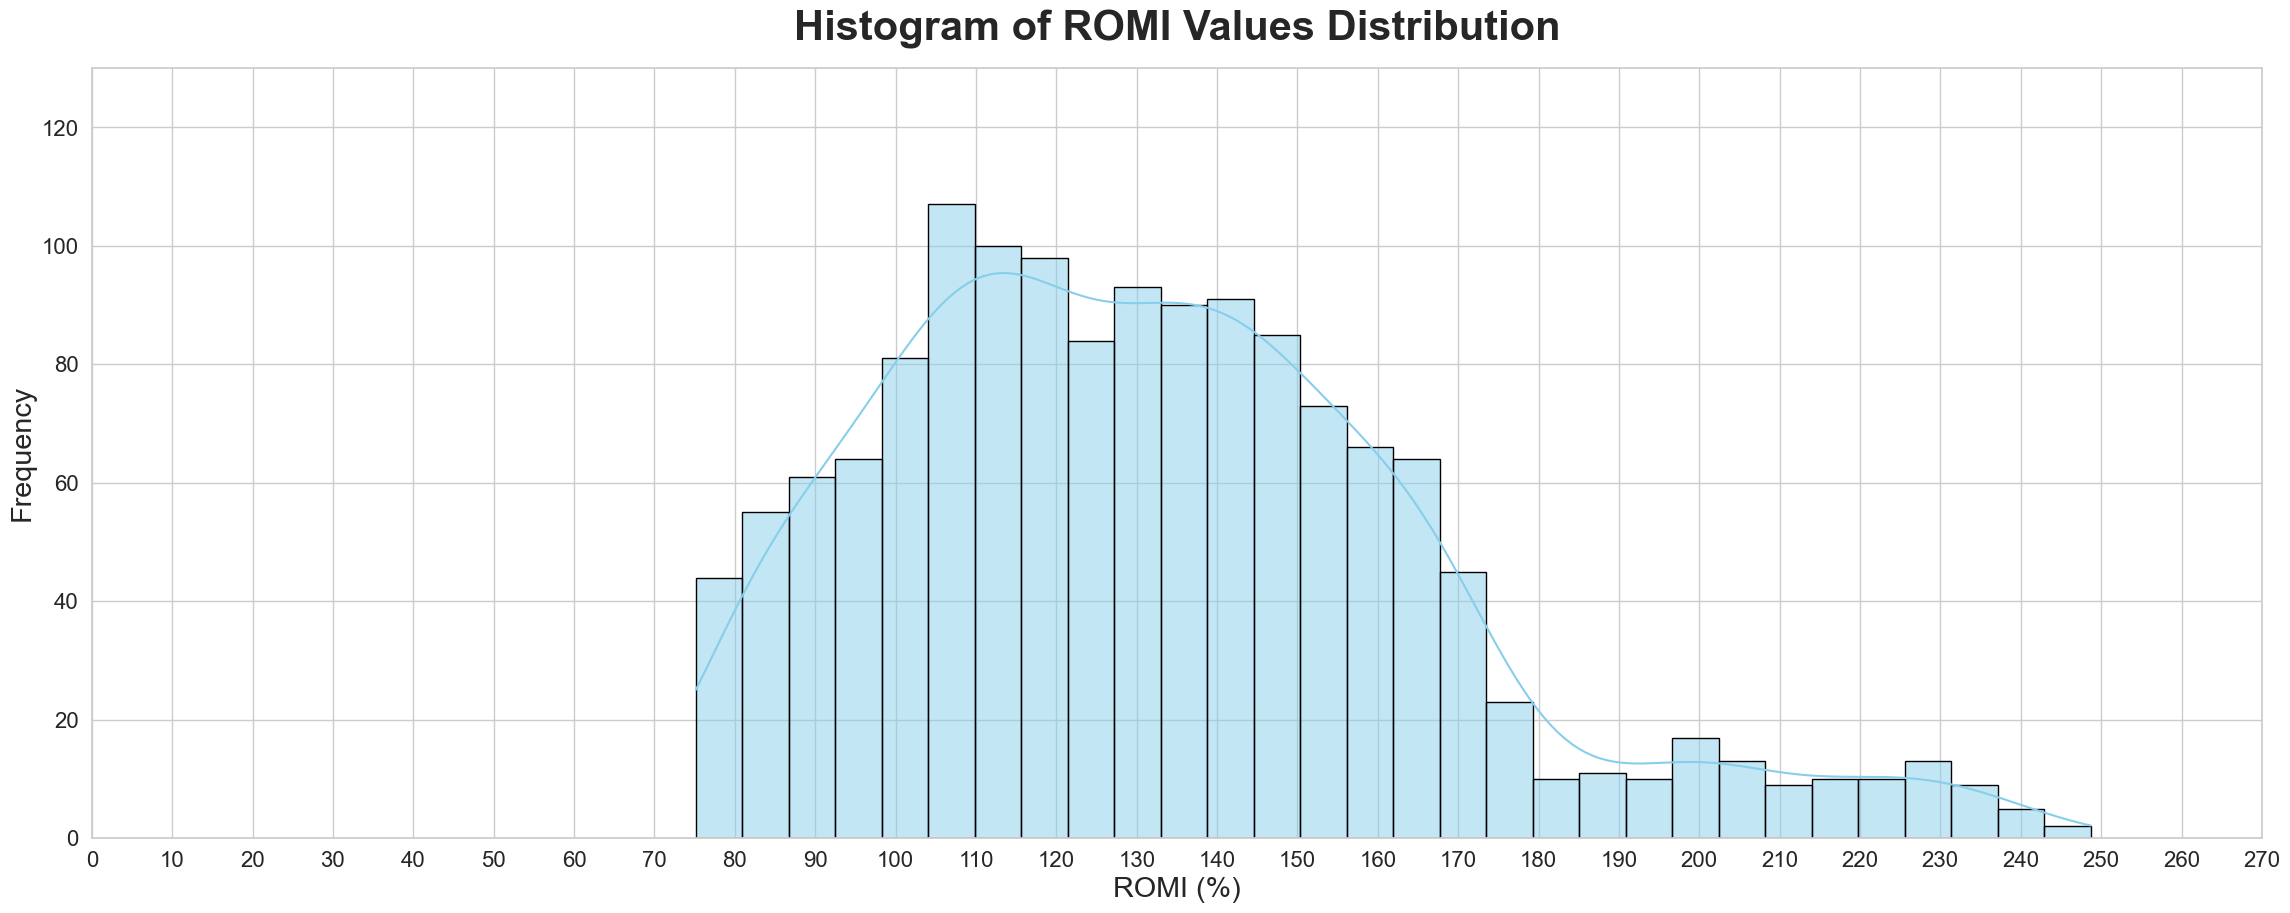

In [12]:
# Create histogram to show the distribution of ROMI values in the data set table.
hist_plot = sns.histplot(campaigns['romi_perc'], bins=30, color='skyblue', edgecolor='black', kde=True)
plt.title('Histogram of ROMI Values Distribution', fontdict={'fontsize': 30, 'fontweight': 'bold'}, pad = 20)
plt.xlabel('ROMI (%)', fontsize='xx-large')
plt.ylabel('Frequency', fontsize= 'xx-large')
hist_plot.tick_params(axis= 'both', which='major', labelsize=16)

plt.xticks(range( 0 , int(campaigns['romi_perc'].max()) + 50, 10)) # set x-axis tick step

hist_plot.set_xlim(0, 270) # set x-axis limits
hist_plot.set_ylim(0, 130) # set y-axis limits

plt.show()

## 5. Build a heatmap of the correlation between all numerical indicators in the facebook_ads_data.csv table. Identify which indicators have the highest and lowest correlation. What does "total_value" correlate with?

In [13]:
campaigns.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1443 entries, 2 to 1493
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ad_date            1443 non-null   object 
 1   campaign_name      1443 non-null   object 
 2   total_spend        1443 non-null   float64
 3   total_impressions  1443 non-null   int64  
 4   total_clicks       1443 non-null   int64  
 5   total_value        1443 non-null   float64
 6   cpc                1443 non-null   float64
 7   cpm                1443 non-null   float64
 8   ctr                1443 non-null   float64
 9   romi               1443 non-null   float64
 10  romi_perc          1443 non-null   float64
dtypes: float64(7), int64(2), object(2)
memory usage: 135.3+ KB


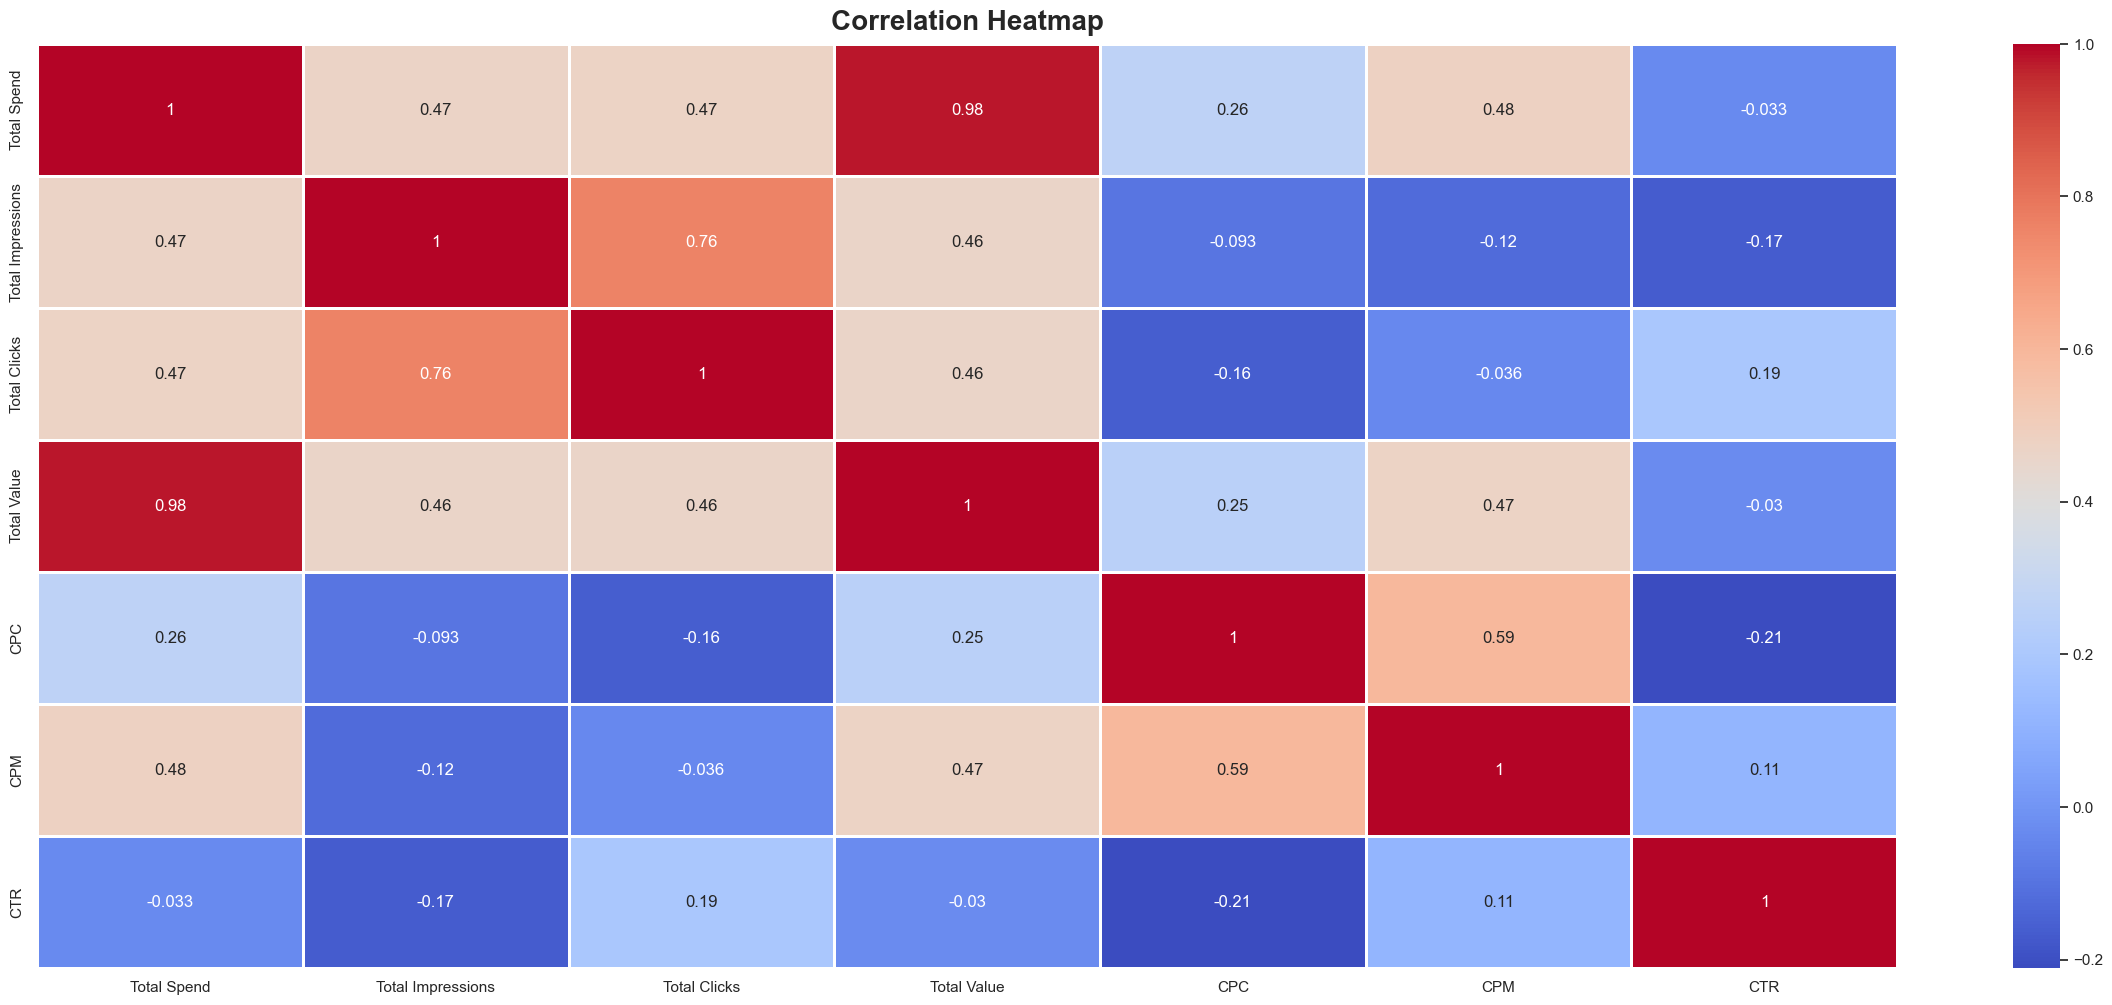

In [14]:
# Build a heatmap of the correlation
df = campaigns.iloc[:, 2:9] # get data frame for the chart
plt.figure(figsize=(30, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', xticklabels= ['Total Spend', 'Total Impressions', 'Total Clicks', 'Total Value', 'CPC', 'CPM', 'CTR'], yticklabels = ['Total Spend', 'Total Impressions', 'Total Clicks', 'Total Value', 'CPC', 'CPM', 'CTR'], linewidth = 1)
plt.title('Сorrelation Heatmap', fontdict={'fontsize': 20, 'fontweight': 'bold'}, pad = 10)

plt.show()

In [15]:
# What is "total_value" correlated with?
correlation_matrix = df.corr()
total_value_corr = correlation_matrix['total_value'].drop('total_value')  # Drop the self-correlation
print(f'Correlation of "Total value" with other indicators:\n{round(total_value_corr, 2)}')

Correlation of "Total value" with other indicators:
total_spend          0.98
total_impressions    0.46
total_clicks         0.46
cpc                  0.25
cpm                  0.47
ctr                 -0.03
Name: total_value, dtype: float64


In [16]:
# Which indicators have the highest and lowest correlation?

highest_corr = correlation_matrix.unstack().sort_values().drop_duplicates().tail(2) # Get the highest correlation pairs
lowest_corr = correlation_matrix.unstack().sort_values().drop_duplicates().head(2) # Get the lowest correlation pairs

print(f'Highest correlation:\n{round(highest_corr, 2)}\n')
print(f'Lowest correlation:\n{round(lowest_corr, 2)}')

Highest correlation:
total_value  total_spend    0.98
total_spend  total_spend    1.00
dtype: float64

Lowest correlation:
cpc  ctr                 -0.21
ctr  total_impressions   -0.17
dtype: float64


## 6. Create a scatter plot with linear regression using the lmplot() function to visualize the relationship between "total_spend" and "total_value."

C:\Users\plish\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


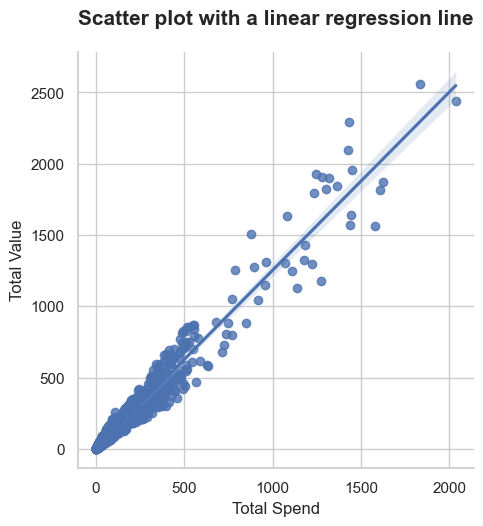

In [17]:
# Create a scatter plot with linear regression
sns.lmplot(x='total_spend', y='total_value', data=campaigns)
plt.title('Scatter plot with a linear regression line', fontdict={'fontsize': 15, 'fontweight': 'bold'}, pad = 20)
plt.xlabel('Total Spend', fontsize='medium')
plt.ylabel('Total Value', fontsize= 'medium')
hist_plot.tick_params(axis= 'both', which='major', labelsize=10)

#plt.xticks(range( 0 , int(campaigns['romi_perc'].max()) + 50, 10)) # set x-axis tick step

hist_plot.set_xlim(0, 2500) # set x-axis limits
hist_plot.set_ylim(0, 3000) # set y-axis limits

plt.show()